In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse as sp


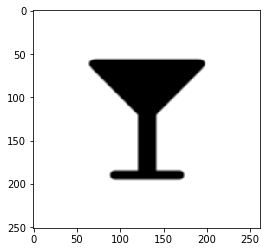

In [162]:
IMAGE = cv2.imread('im10.png', 0)
IMAGE = cv2.GaussianBlur(IMAGE, (3,3),cv2.BORDER_DEFAULT)
Lx, Ly = np.shape(IMAGE)
# plt.figure(1)
plt.imshow(IMAGE,'gray')
plt.show()

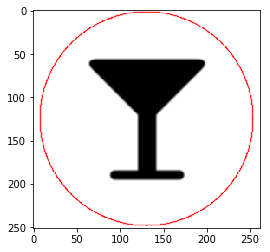

In [163]:
###Creation du snake###
centre=[int(Ly/2),int(Lx/2)]
rayon=min(int((Lx-5)/2), int((Ly-5)/2))

K = 1000
snakeX = []
snakeY = []
pas = (2*np.pi)/K
for i in range(K):
    theta = i*pas
    snakeX = np.append(snakeX, int(centre[0] + rayon * np.cos(theta)))
    snakeY = np.append(snakeY, int(centre[1] + rayon * np.sin(theta)))
# print(snakeX.shape)
c = np.zeros((K,1,2))
# print(c.shape)
c[:,:,0] = snakeX.reshape((K,1))
c[:,:,1] = snakeY.reshape((K,1))
#c = np.concatenate((snakeX.reshape((K,1)),snakeY.reshape((K,1))),axis=2)
# print(c[:,0,0])
contour_list = []
contour_list.append(c.astype(int))
snake = cv2.drawContours(image=cv2.cvtColor(IMAGE, cv2.COLOR_GRAY2BGR),contours=contour_list, contourIdx=-1, color=(255, 0, 0), thickness=1,lineType=cv2.LINE_AA)
plt.imshow(snake)

In [164]:
### Parametres ###
alpha = 10
beta = 0.5
gamma = 1.8

In [165]:
###Creation de D2, D4, D et A###
Id = np.identity(K)
D1 = np.roll(Id, 1, axis=-1) + Id*(0) - np.roll(Id,-1, axis=1)
D2 = np.roll(Id, -1, axis=1) + Id*(-2) + np.roll(Id,1, axis=1)
D4 = (np.roll(Id, -1, axis=1) + np.roll(Id,1, axis=1))*-4 + (np.roll(Id, -2, axis=1) + np.roll(Id,2, axis=1)) + Id*(6)
D = alpha*D2 - beta*D4
A = np.linalg.inv(Id - D)


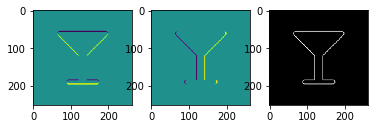

In [166]:
# Le Gradient
[Gx,Gy] = np.gradient(IMAGE.astype(float))
plt.figure()
plt.subplot(1,3,1)
plt.imshow(Gx)
plt.subplot(1,3,2)
plt.imshow(Gy)
Gx_norm = Gx/np.max(Gx)
Gy_norm = Gy/np.max(Gy)
NormeGrad = np.square(Gx_norm)+np.square(Gy_norm)

plt.subplot(1,3,3)
plt.imshow(NormeGrad,'gray')
plt.show()
#NormeGrad = NormeGrad*20
# Gradient de la norme 
[GGx,GGy] = np.gradient(NormeGrad.astype(float))

In [167]:
# Algo ITERATIF
limite = 7000
iteration = 0
nbfigure = 1

Energie = list()

MEMORY = []
Xn = snakeX
Yn = snakeY
MEMORY.append([Xn,Yn])

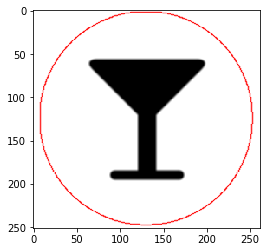

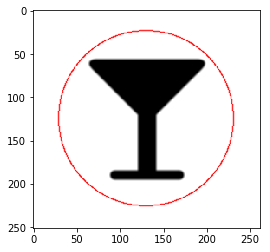

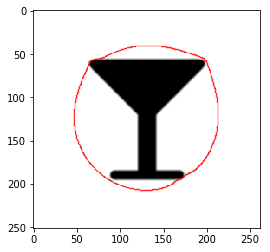

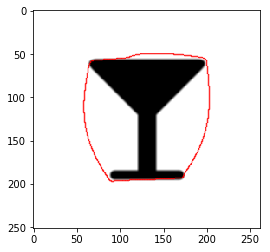

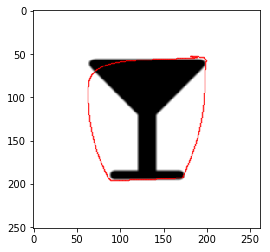

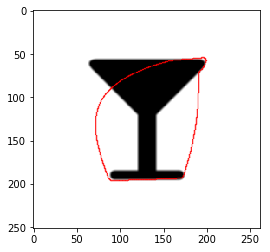

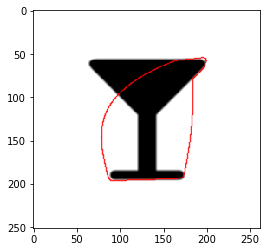

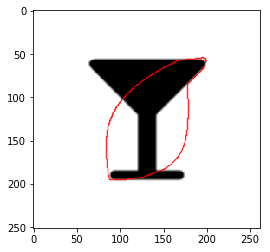

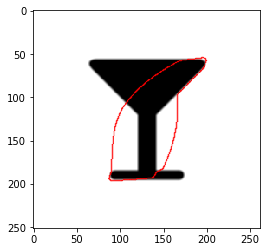

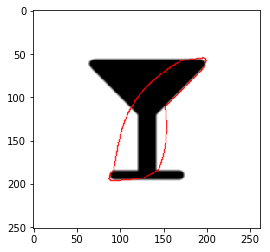

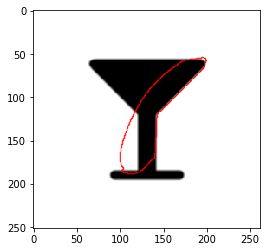

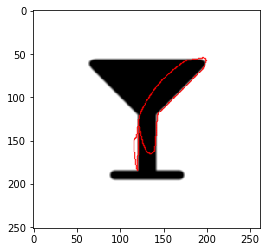

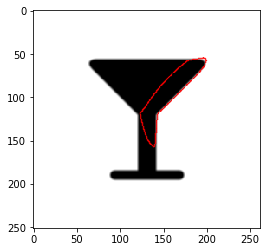

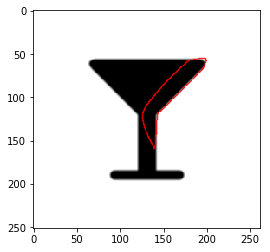

In [168]:
flag = True
while flag or (iteration < limite):
    # itération du SNAKE
    Xn1 = np.dot(A, Xn + gamma*GGx[Yn.astype(int),Xn.astype(int)] )
    Yn1 = np.dot(A, Yn + gamma*GGy[Yn.astype(int),Xn.astype(int)] )     
    Xn = Xn1
    Yn = Yn1   
    MEMORY.append([Xn,Yn])
    # Calcul de l'energie
    ELA = 0
    COURB  = 0
    EXT = 0
    Xnprime = np.dot(D1, Xn)
    Ynprime = np.dot(D1, Yn)
    Xnseconde = np.dot(D2, Xn)
    Ynseconde = np.dot(D2, Yn)
    for k in range(K):
        ELA += alpha*0.5*np.sqrt(np.square(Xnprime[k]) + np.square(Ynprime[k]))
        COURB += beta*0.5*np.sqrt(np.square(Xnseconde[k]) + np.square(Ynseconde[k]))
        EXT += NormeGrad[int(Yn[k]),int(Xn[k])]**2
    Energie.append(ELA+COURB+EXT)

    # Flag de sortie
    # if iteration > 200:
    #     nbSplit = iteration // 50
    #     EnerSplit = np.split(Energie, nbSplit)
    #     e1 = EnerSplit[-1]
    #     e2 = EnerSplit[-2]
    if (abs(Energie[iteration]-Energie[iteration-1])/Energie[iteration]<10):
        flag = False

    # Affichage
    if iteration % 500 == 0:
        plt.figure(nbfigure)
        c = np.zeros((K,1,2))
        c[:,:,0] = Xn1.reshape((K,1))
        c[:,:,1] = Yn1.reshape((K,1))
        contour_list = []
        contour_list.append(c.astype(int))
        snake = cv2.drawContours(image=cv2.cvtColor(IMAGE, cv2.COLOR_GRAY2BGR),contours=contour_list, contourIdx=-1, color=(255, 0, 0), thickness=1,lineType=cv2.LINE_AA)
        plt.imshow(snake)
        nbfigure += 1

    # Fin de la boucle
    iteration += 1


(1000, 1, 2)


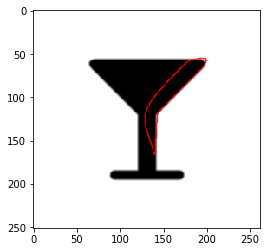

In [169]:
c = np.zeros((K,1,2))
print(c.shape)
c[:,:,0] = Xn1.reshape((K,1))
c[:,:,1] = Yn1.reshape((K,1))
contour_list = []
contour_list.append(c.astype(int))
snake = cv2.drawContours(image=cv2.cvtColor(IMAGE, cv2.COLOR_GRAY2BGR),contours=contour_list, contourIdx=-1, color=(255, 0, 0), thickness=1,lineType=cv2.LINE_AA)
plt.imshow(snake)

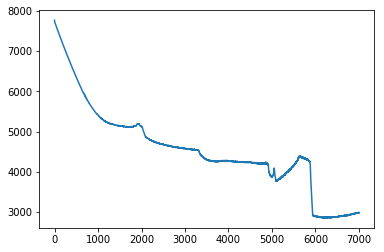

In [170]:
plt.plot(Energie)
plt.show()

vérigfier encodage de l'image de gradient uint8 ou float dans la methode np.gradient
 => np.gradient renvoit un objet du même type que son entrée

[fait] filtre moyenneur sur l'image pour avoir un terme d'énergie externe plus diffus

moyenne sur fenetre glissante de 50 echantillons


imagemagick faire des videos 